In [23]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.lines as lines
import matplotlib.colors
%matplotlib inline
import seaborn as sns
import plotly as py
import plotly.graph_objs as go

import warnings
warnings.filterwarnings('ignore')

import datetime as dt
import missingno as msno
import random

from PIL import Image
plt.rcParams['figure.dpi'] = 140


## EDA

In [24]:
df = pd.read_csv('netflix_titles.csv')
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevitable."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy Mahlangu, Ryle De Morny, Greteli Fincham, Sello Maake Ka-Ncube, Odwa Gwanya, Mekaila Mathys, Sandi Schultz, Duane Williams, Shamilla Miller, Patrick Mofokeng",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town teen sets out to prove whether a private-school swimming star is her sister who was abducted at birth."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabiha Akkari, Sofia Lesaffre, Salim Kechiouche, Noureddine Farihi, Geert Van Rampelberg, Bakary Diombera",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Action & Adventure","To protect his family from a powerful drug lord, skilled thief Mehdi and his expert team of robbers are pulled into a violent and deadly turf war."


In [25]:
for i in df.columns:
    null_rate = df[i].isna().sum()/len(df)*100
    if null_rate > 0:
        print(("{}: null rate: {}%".format(i, round(null_rate,2))))

director: null rate: 29.91%
cast: null rate: 9.37%
country: null rate: 9.44%
date_added: null rate: 0.11%
rating: null rate: 0.05%
duration: null rate: 0.03%


## Dealing with missing data
+ replace blank countries with mode (most common) country
+ drop nulls and duplicates

In [26]:
# replacement
df['country'] = df['country'].fillna(df['country'].mode()[0])
df['cast'].replace(np.nan, 'No Data', inplace=True)
df['director'].replace(np.nan, 'No Data', inplace = True)

# drops
df.dropna(inplace = True)

# drop duplicates
df.drop_duplicates(inplace=True)

In [27]:
# check
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8790 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   cast          8790 non-null   object
 5   country       8790 non-null   object
 6   date_added    8790 non-null   object
 7   release_year  8790 non-null   int64 
 8   rating        8790 non-null   object
 9   duration      8790 non-null   object
 10  listed_in     8790 non-null   object
 11  description   8790 non-null   object
dtypes: int64(1), object(11)
memory usage: 892.7+ KB


## Dealing with Date value

In [29]:
df['date_added'] = pd.to_datetime(df['date_added'])
df['month_added'] = df['date_added'].dt.month
df['month_name_added'] = df['date_added'].dt.month_name()
df['year_added'] = df['date_added'].dt.year

df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevitable.",9,September,2021
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy Mahlangu, Ryle De Morny, Greteli Fincham, Sello Maake Ka-Ncube, Odwa Gwanya, Mekaila Mathys, Sandi Schultz, Duane Williams, Shamilla Miller, Patrick Mofokeng",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town teen sets out to prove whether a private-school swimming star is her sister who was abducted at birth.",9,September,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabiha Akkari, Sofia Lesaffre, Salim Kechiouche, Noureddine Farihi, Geert Van Rampelberg, Bakary Diombera",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Action & Adventure","To protect his family from a powerful drug lord, skilled thief Mehdi and his expert team of robbers are pulled into a violent and deadly turf war.",9,September,2021


## Feature Engineering

In [30]:
df['count'] = 1
df['first_country'] = df['country'].apply(lambda x: x.split(",")[0])
df['first_country'].head(7)

# rating age
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults', 
    'NC-17': 'Adults'
}

df['target_ages'] = df['rating'].replace(ratings_ages)
df['target_ages'].unique()

array(['Teens', 'Adults', 'Older Kids', 'Kids'], dtype=object)

In [31]:
#https://www.kaggle.com/code/emilyjiminroh/netflix-dataset-eda-visualization-team1/notebook
    

In [32]:
# Genre
df['genre'] = df['listed_in'].apply(lambda x: x.replace(' ,', ',').replace(',', ',').split(','))

# reduce name length
df['first_country'].replace('United States', 'USA', inplace=True)
df['first_country'].replace('United Kingdom', 'UK', inplace=True)
df['first_country'].replace('South Korea', 'S. Korea', inplace=True)

data = df.groupby('first_country')['count'].sum().sort_values(ascending=False)[:10]

## Visualization

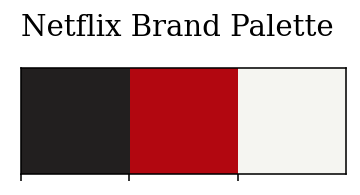

In [33]:
sns.palplot(['#221f1f', '#b20710', '#f5f5f1'])
plt.title('Netflix Brand Palette', loc='left', fontfamily = 'serif',
         fontsize=15, y=1.2)
plt.show()

## Content analysis - movie vs tv

In [34]:
x = df.groupby(['type'])['type'].count()
y = len(df)
r = ((x/y)).round(2)

movie_film_ratio = pd.DataFrame(r).T
movie_film_ratio


type,Movie,TV Show
type,0.7,0.3


[]

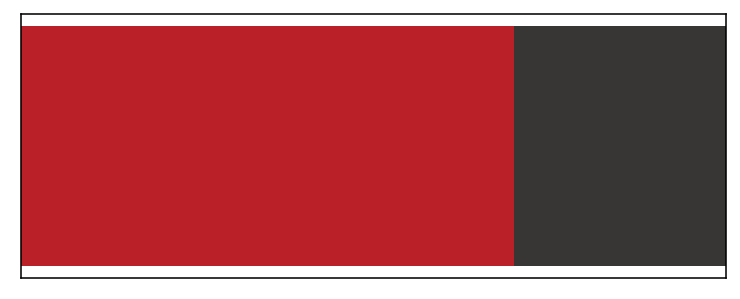

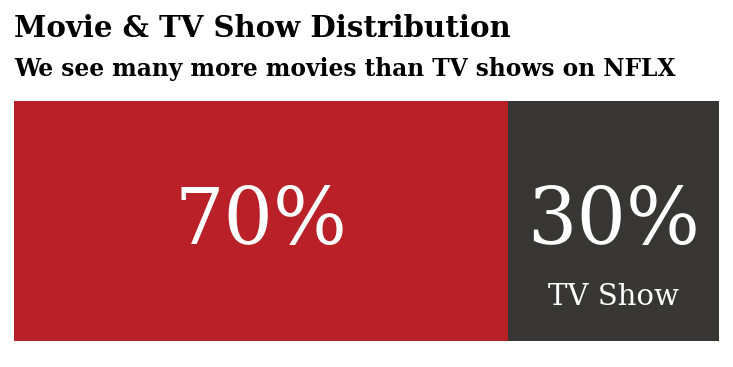

In [38]:
fig, ax  = plt.subplots(1,1,figsize=(6.5, 2.5))

ax.barh(movie_film_ratio.index, movie_film_ratio['Movie'],
       color='#b20710', alpha=0.9, label = 'Male')
ax.barh(movie_film_ratio.index, movie_film_ratio['TV Show'],
       left = movie_film_ratio['Movie'], color='#221f1f', alpha=0.9, label='Female')

ax.set_xlim(0,1)
ax.set_xticks([])
ax.set_yticks([])



# movie %
for i in movie_film_ratio.index:
    ax.annotate(f"{int(movie_film_ratio['Movie'][i]*100)}%",
               xy = (movie_film_ratio['Movie'][i]/2, i),
               va = 'center', ha='center', fontsize=40, fontweight='light',
               fontfamily='serif', color='white')
    
for i in movie_film_ratio.index:
    ax.annotate(f"{int(movie_film_ratio['TV Show'][i]*100)}%",
               xy = (movie_film_ratio['Movie'][i]+movie_film_ratio['TV Show'][i]/2, i),
               va = 'center', ha='center', fontsize=40, fontweight='light',
               fontfamily='serif', color='white')
    ax.annotate('TV Show',
               xy=(movie_film_ratio['Movie'][i]+movie_film_ratio['TV Show'][i]/2, -.25),
               va='center', ha='center', fontsize=15, fontweight='light', fontfamily='serif',
               color='white')
# title and subtitle
fig.text(0.125, 1.03, 'Movie & TV Show Distribution', fontfamily = 'serif',
        fontsize=15, fontweight='bold')
fig.text(0.125, 0.92, 'We see many more movies than TV shows on NFLX', fontfamily = 'serif',
        fontsize=12, fontweight='bold')

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
    
# remove legend due to laelled plot
ax.legend().set_visible(False)
plt.show()
    
    

## By country

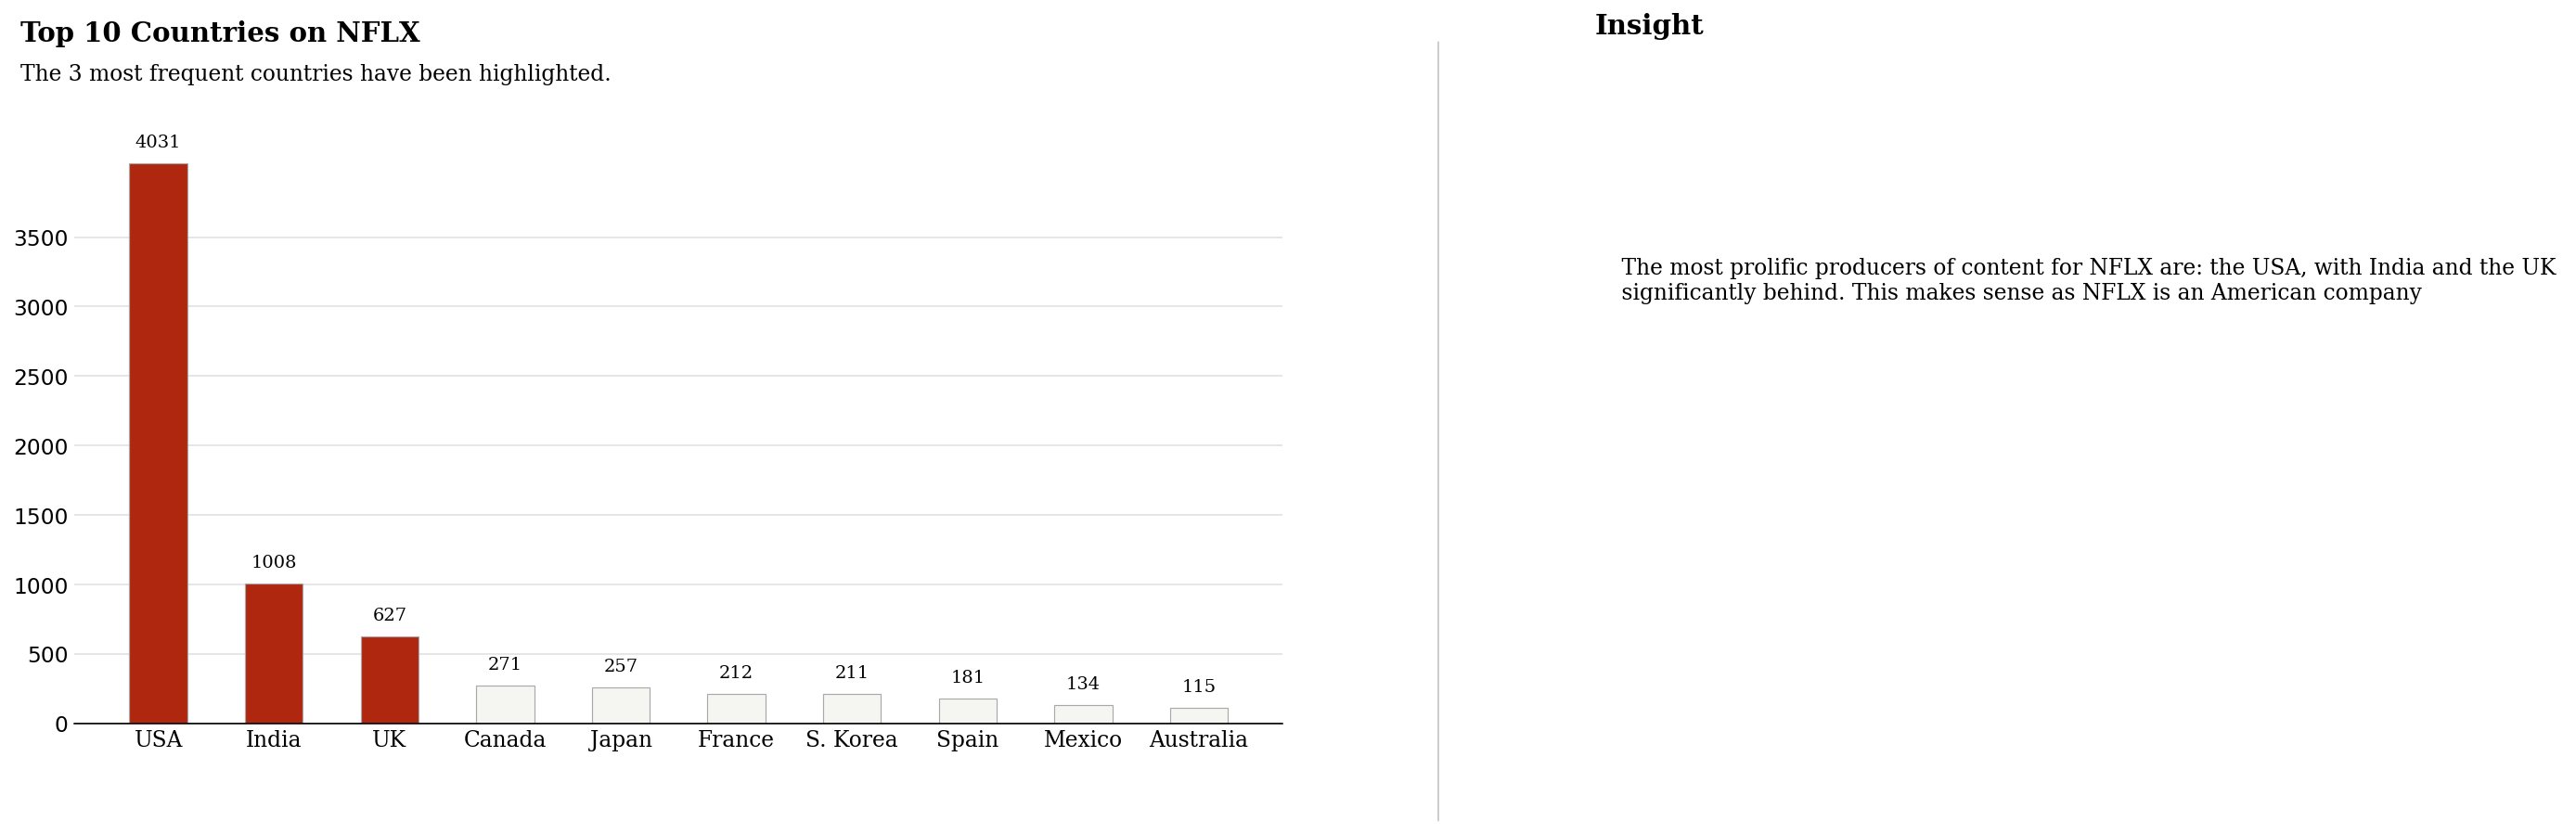

In [39]:
color_map = ['#f5f5f1' for _ in range(10)]
color_map[0] = color_map[1] = color_map[2] = '#b02710'

fig, ax = plt.subplots(1,1, figsize=(12,6))
ax.bar(data.index, data, width=0.5, edgecolor='darkgray', linewidth=0.6, color=color_map)

for i in data.index:
    ax.annotate(f"{data[i]}",
               xy=(i, data[i] +150),
               va='center', ha='center',
               fontweight = 'light', fontfamily='serif')
    
for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
ax.set_xticklabels(data.index, fontfamily='serif', rotation=0)

fig.text(0.09, 1, 'Top 10 Countries on NFLX', fontsize=15, fontweight='bold',
        fontfamily='serif')
fig.text(0.09, 0.95, 'The 3 most frequent countries have been highlighted.',
        fontsize=12, fontweight='light', fontfamily='serif')
fig.text(1.1, 1.01, 'Insight', fontsize=15, fontweight='bold', fontfamily='serif')

fig.text(1.1, 0.67, """
    The most prolific producers of content for NFLX are: the USA, with India and the UK 
    significantly behind. This makes sense as NFLX is an American company""", fontsize=12, fontweight='light',
        fontfamily='serif')

ax.grid(axis='y', linestyle='-', alpha=0.4)

grid_y_ticks = np.arange(0,4000, 500)
ax.set_yticks(grid_y_ticks)
ax.set_axisbelow(True)

plt.axhline(y=0, color='black', linewidth=1.3, alpha=0.7)
ax.tick_params(axis='both', which='major', labelsize=12)

l1 = lines.Line2D([1,1], [0,1], transform=fig.transFigure, figure=fig,
                 color='black', lw=0.2)
fig.lines.extend([l1])

ax.tick_params(axis=u'both', which=u'both', length=0)

plt.show()